# Plan for today

- Download price data of multiple stocks
- Compute Daily and Monthly returns
- Compute Correlations
- Compute Cumulative Returns
- Annualized Returns and Risk (std. deviation)

In [1]:
# Installation of python modules

!pip install pandas
!pip install numpy
!pip install yfinance
!pip install matplotlib

In [2]:
# @title
# Importing data manipulation modules
import pandas as pd
import numpy as np

# Importing data visulations modules
import matplotlib.pyplot as plt

# Importing finance modules
import yfinance as yf

# Download data

We will be using a free python api library called [y-finance](https://pypi.org/project/yfinance/) and is a popular open-source library that allows users to download historical market data from Yahoo Finance. It simplifies the process of accessing financial data for stocks, bonds, and other assets, providing both historical and real-time data for analysis, research, and modeling.

Although, it is great for experimentation it is too unreliable to be used in the actaul implementation of algos due to rate limiting, throttling and data inaccuracy.

In [3]:
# Ticker list to download
tickers = 'SPY QQQ TLT AAPL MSFT GOOG AMZN NFLX NVDA MA ADBE' # Why would we use these instead of just company names?

# Download data from Yahoo-Finance
data = yf.download(
    tickers = tickers, # The stocks do we want to get
    interval = "1d", # The sample rate of the data
    start="2020-01-01", # From what point do we want to start getting stock data
    end="2024-04-30", # From what point do we want to stop getting stock data
    ignore_tz=True,
    auto_adjust=True, # Adjust all fields by splits and dividends
)

[*********************100%***********************]  11 of 11 completed


In [4]:
# What data does y-finance give us?
data

Price                           Close                                      \
Ticker                           AAPL        ADBE        AMZN        GOOG   
Date                                                                        
2020-01-02 00:00:00+00:00   72.876129  334.429993   94.900497   68.201012   
2020-01-03 00:00:00+00:00   72.167595  331.809998   93.748497   67.866325   
2020-01-06 00:00:00+00:00   72.742661  333.709991   95.143997   69.539726   
2020-01-07 00:00:00+00:00   72.400528  333.390015   95.343002   69.496330   
2020-01-08 00:00:00+00:00   73.565201  337.869995   94.598503   70.043991   
...                               ...         ...         ...         ...   
2024-04-23 00:00:00+00:00  166.481216  472.899994  179.539993  159.528229   
2024-04-24 00:00:00+00:00  168.595917  477.119995  176.589996  160.705338   
2024-04-25 00:00:00+00:00  169.463730  473.440002  173.669998  157.563049   
2024-04-26 00:00:00+00:00  168.875214  477.559998  179.619995  173.264496   
2024-04-29 00:00:00+00:00  173.064667  473.070007  180.960007  167.488663   

Price                                                                     \
Ticker                             MA        MSFT        NFLX       NVDA   
Date                                                                       
2020-01-02 00:00:00+00:00  295.023956  153.938232  329.809998   5.973122   
2020-01-03 00:00:00+00:00  292.145447  152.021454  325.899994   5.877517   
2020-01-06 00:00:00+00:00  292.923431  152.414352  335.829987   5.902164   
2020-01-07 00:00:00+00:00  291.931519  151.024689  330.750000   5.973620   
2020-01-08 00:00:00+00:00  297.082581  153.430267  339.260010   5.984824   
...                               ...         ...         ...        ...   
2024-04-23 00:00:00+00:00  461.521881  406.104218  577.750000  82.409180   
2024-04-24 00:00:00+00:00  461.202728  407.588867  555.119995  79.663643   
2024-04-25 00:00:00+00:00  460.813812  397.604919  564.799988  82.618149   
2024-04-26 00:00:00+00:00  461.122986  404.858704  561.229980  87.720284   
2024-04-29 00:00:00+00:00  455.817902  400.803345  559.489990  87.742287   

Price                                              ...   Volume            \
Ticker                            QQQ         SPY  ...     ADBE      AMZN   
Date                                               ...                      
2020-01-02 00:00:00+00:00  209.976089  302.208679  ...  1990100  80580000   
2020-01-03 00:00:00+00:00  208.052765  299.920258  ...  1577600  75288000   
2020-01-06 00:00:00+00:00  209.393295  301.064453  ...  1874700  81236000   
2020-01-07 00:00:00+00:00  209.364120  300.217957  ...  2500800  80898000   
2020-01-08 00:00:00+00:00  210.937729  301.817932  ...  2248500  70160000   
...                               ...         ...  ...      ...       ...   
2024-04-23 00:00:00+00:00  423.799896  502.482697  ...  2205800  37046500   
2024-04-24 00:00:00+00:00  425.235596  502.244202  ...  2338000  34185100   
2024-04-25 00:00:00+00:00  423.181793  500.336243  ...  2250900  49249400   
2024-04-26 00:00:00+00:00  429.712189  505.076385  ...  2460300  43919800   
2024-04-29 00:00:00+00:00  431.456970  506.865082  ...  2954700  54063900   

Price                                                                       \
Ticker                         GOOG       MA      MSFT     NFLX       NVDA   
Date                                                                         
2020-01-02 00:00:00+00:00  28132000  3272400  22622100  4485800  237536000   
2020-01-03 00:00:00+00:00  23728000  2501300  21116200  3806900  205384000   
2020-01-06 00:00:00+00:00  34646000  3307200  20813700  5663100  262636000   
2020-01-07 00:00:00+00:00  30054000  3182000  21634100  4703200  314856000   
2020-01-08 00:00:00+00:00  30560000  3224400  27746500  7104500  277108000   
...                             ...      ...       ...      ...        ...   
2024-04-23 00:00:00+00:00  16115400  2029100  15734500  4975500  438559000 

In [5]:
print(data.columns)

MultiIndex([( 'Close', 'AAPL'),
            ( 'Close', 'ADBE'),
            ( 'Close', 'AMZN'),
            ( 'Close', 'GOOG'),
            ( 'Close',   'MA'),
            ( 'Close', 'MSFT'),
            ( 'Close', 'NFLX'),
            ( 'Close', 'NVDA'),
            ( 'Close',  'QQQ'),
            ( 'Close',  'SPY'),
            ( 'Close',  'TLT'),
            (  'High', 'AAPL'),
            (  'High', 'ADBE'),
            (  'High', 'AMZN'),
            (  'High', 'GOOG'),
            (  'High',   'MA'),
            (  'High', 'MSFT'),
            (  'High', 'NFLX'),
            (  'High', 'NVDA'),
            (  'High',  'QQQ'),
            (  'High',  'SPY'),
            (  'High',  'TLT'),
            (   'Low', 'AAPL'),
            (   'Low', 'ADBE'),
            (   'Low', 'AMZN'),
            (   'Low', 'GOOG'),
            (   'Low',   'MA'),
            (   'Low', 'MSFT'),
            (   'Low', 'NFLX'),
            (   'Low', 'NVDA'),
            (   'Low',  'QQQ'),
        

In [6]:
# Using the inbuilt pandas function describe() to give a description of the Close data
data['Close'].describe()

Ticker,AAPL,ADBE,AMZN,GOOG,MA,MSFT,NFLX,NVDA,QQQ,SPY,TLT
count,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000
mean,141.826123,466.359026,139.736024,111.236428,351.368119,268.338705,431.730754,25.200075,318.397377,389.204947,117.287079
std,33.989670,100.201610,28.020436,26.606781,47.235550,66.294066,123.752572,18.741845,59.931287,60.724800,21.561374
min,54.569729,275.200012,81.820000,52.701576,197.957657,130.141037,166.369995,4.892764,164.456680,208.617645,79.576584
25%,123.161757,377.235001,115.859873,89.140467,324.299469,220.870274,342.472504,13.262403,278.721214,356.089409,96.514935
50%,146.216522,470.039993,146.082001,114.409782,349.358505,260.991608,440.349991,18.754786,317.173691,397.610367,122.718700
75%,169.601257,531.047516,163.465496,135.438644,372.990738,315.344269,520.725006,29.355953,362.096558,429.497025,136.278896
max,197.361084,688.369995,189.050003,173.264496,486.595459,427.825806,691.690002,94.986069,445.046234,519.892944,154.072281


In [7]:
# Using the inbuilt pandas function describe() to give a description of the Close data
data['Volume'].describe()

Ticker,AAPL,ADBE,AMZN,GOOG,MA,MSFT,NFLX,NVDA,QQQ,SPY,TLT
count,1.088000e+03,1.088000e+03,1.088000e+03,1.088000e+03,1.088000e+03,1.088000e+03,1.088000e+03,1.088000e+03,1.088000e+03,1.088000e+03,1.088000e+03
mean,9.605444e+07,3.063534e+06,7.293570e+07,2.884837e+07,3.607784e+06,3.000829e+07,6.837810e+06,4.684121e+08,5.219586e+07,8.670567e+07,2.141948e+07
std,5.352598e+07,1.806683e+06,3.381676e+07,1.273850e+07,1.892933e+06,1.282472e+07,6.636701e+06,1.872399e+08,2.248659e+07,4.198905e+07,1.409692e+07
min,2.404830e+07,5.892000e+05,2.237840e+07,6.936000e+06,9.444000e+05,9.200800e+06,1.144000e+06,9.788400e+07,1.549880e+07,2.645790e+07,3.117100e+06
25%,6.087352e+07,2.078650e+06,5.077100e+07,2.040252e+07,2.403075e+06,2.184642e+07,3.676025e+06,3.430572e+08,3.656578e+07,6.200395e+07,1.192592e+07
50%,8.144755e+07,2.598150e+06,6.385000e+07,2.558310e+07,3.095300e+06,2.675055e+07,5.277100e+06,4.472735e+08,4.794995e+07,7.669410e+07,1.752070e+07
75%,1.126557e+08,3.508225e+06,8.526510e+07,3.321350e+07,4.103675e+06,3.393732e+07,7.809450e+06,5.692942e+08,6.276675e+07,9.763808e+07,2.554638e+07
max,4.265100e+08,2.784020e+07,3.113460e+08,9.779860e+07,1.503150e+07,9.701270e+07,1.333875e+08,1.543911e+09,1.986858e+08,3.922207e+08,8.897510e+07


As we are only interested interested in the closing price on the day we will select this parameter and create a new DataFrame

In [8]:
# Copy the close data over to a new dataframe
df = data['Close'].copy()

In [9]:
# Display our data using the head(num_of_values) functions
df.head(10)

Ticker,AAPL,ADBE,AMZN,GOOG,MA,MSFT,NFLX,NVDA,QQQ,SPY,TLT
Date,,,,,,,,,,,
2020-01-02 00:00:00+00:00,72.876129,334.429993,94.900497,68.201012,295.023956,153.938232,329.809998,5.973122,209.976089,302.208679,121.880478
2020-01-03 00:00:00+00:00,72.167595,331.809998,93.748497,67.866325,292.145447,152.021454,325.899994,5.877517,208.052765,299.920258,123.757469
2020-01-06 00:00:00+00:00,72.742661,333.709991,95.143997,69.539726,292.923431,152.414352,335.829987,5.902164,209.393295,301.064453,123.054710
2020-01-07 00:00:00+00:00,72.400528,333.390015,95.343002,69.496330,291.931519,151.024689,330.750000,5.973620,209.364120,300.217957,122.449783
2020-01-08 00:00:00+00:00,73.565201,337.869995,94.598503,70.043991,297.082581,153.430267,339.260010,5.984824,210.937729,301.817932,121.640282
2020-01-09 00:00:00+00:00,75.127785,340.450012,95.052498,70.817581,300.977509,155.347092,335.660004,6.050553,212.725128,303.864410,122.067291
2020-01-10 00:00:00+00:00,75.297638,339.809998,94.157997,71.311378,302.993103,154.628265,329.049988,6.082919,212.181168,302.990051,123.152565
2020-01-13 00:00:00+00:00,76.906296,345.630005,94.565002,71.785210,306.926880,156.487564,338.920013,6.273633,214.629028,305.073914,122.778900
2020-01-14 00:00:00+00:00,75.867836,344.630005,93.472000,71.368729,302.476990,155.385376,338.690002,6.156617,213.783966,304.608673,123.410538


In [10]:
# Check to see how many null (no values) we have in our data (it should be 0 if y-finance has worked)
print(f"There are {df.isnull().sum().sum()} null values across the DataFrame")

# If we did have any rows with null in we would use the next line to remove them:
df[df.notnull().all(1)].head()




There are 0 null values across the DataFrame


Ticker,AAPL,ADBE,AMZN,GOOG,MA,MSFT,NFLX,NVDA,QQQ,SPY,TLT
Date,,,,,,,,,,,
2020-01-02 00:00:00+00:00,72.876129,334.429993,94.900497,68.201012,295.023956,153.938232,329.809998,5.973122,209.976089,302.208679,121.880478
2020-01-03 00:00:00+00:00,72.167595,331.809998,93.748497,67.866325,292.145447,152.021454,325.899994,5.877517,208.052765,299.920258,123.757469
2020-01-06 00:00:00+00:00,72.742661,333.709991,95.143997,69.539726,292.923431,152.414352,335.829987,5.902164,209.393295,301.064453,123.054710
2020-01-07 00:00:00+00:00,72.400528,333.390015,95.343002,69.496330,291.931519,151.024689,330.750000,5.973620,209.364120,300.217957,122.449783
2020-01-08 00:00:00+00:00,73.565201,337.869995,94.598503,70.043991,297.082581,153.430267,339.260010,5.984824,210.937729,301.817932,121.640282


Now let's compute a very simple metric called daily returns

In [11]:
# Using pandas inbuilt function pct_change to compute the daily returns for us
df = df.pct_change()
df.head()

Ticker,AAPL,ADBE,AMZN,GOOG,MA,MSFT,NFLX,NVDA,QQQ,SPY,TLT
Date,,,,,,,,,,,
2020-01-02 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03 00:00:00+00:00,-0.009722,-0.007834,-0.012139,-0.004907,-0.009757,-0.012452,-0.011855,-0.016006,-0.009160,-0.007572,0.015400
2020-01-06 00:00:00+00:00,0.007968,0.005726,0.014886,0.024657,0.002663,0.002584,0.030469,0.004193,0.006443,0.003815,-0.005679
2020-01-07 00:00:00+00:00,-0.004703,-0.000959,0.002092,-0.000624,-0.003386,-0.009118,-0.015127,0.012107,-0.000139,-0.002812,-0.004916
2020-01-08 00:00:00+00:00,0.016087,0.013438,-0.007809,0.007880,0.017645,0.015928,0.025729,0.001875,0.007516,0.005329,-0.006611


In [12]:
# Fill the first row with zero
df = df.fillna(0)

In [13]:
df.head()

Ticker,AAPL,ADBE,AMZN,GOOG,MA,MSFT,NFLX,NVDA,QQQ,SPY,TLT
Date,,,,,,,,,,,
2020-01-02 00:00:00+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-03 00:00:00+00:00,-0.009722,-0.007834,-0.012139,-0.004907,-0.009757,-0.012452,-0.011855,-0.016006,-0.009160,-0.007572,0.015400
2020-01-06 00:00:00+00:00,0.007968,0.005726,0.014886,0.024657,0.002663,0.002584,0.030469,0.004193,0.006443,0.003815,-0.005679
2020-01-07 00:00:00+00:00,-0.004703,-0.000959,0.002092,-0.000624,-0.003386,-0.009118,-0.015127,0.012107,-0.000139,-0.002812,-0.004916
2020-01-08 00:00:00+00:00,0.016087,0.013438,-0.007809,0.007880,0.017645,0.015928,0.025729,0.001875,0.007516,0.005329,-0.006611


## Some context of the data

Benchmarks:
- SPY: S&P 500
- QQQ: Nasdaq-100
- TLT: Long term bond US treasury ETF

In [14]:
benchmarks = ['SPY', "QQQ", "TLT"]
stocks = ['AAPL', 'ADBE', 'AMZN', 'GOOG', 'MA', 'MSFT', 'NFLX', 'NVDA']

# Compute Monthly returns

$$
\text{Monthly Return} = \left( \prod_{i=1}^{n} (1 + r_i) \right) - 1
$$

Where:
- rᵢ = percentage daily return for each day *i* in the month
- Π represents the product of all (1 + rᵢ) terms for the days in the month.


In [15]:
# Resample the data, grouping it into months for the monthly returns to be computed
monthly_ret = df.resample('ME')

# Display the first value of every group (month) for the first 5 months-
monthly_ret.first()[0:5]

Ticker,AAPL,ADBE,AMZN,GOOG,MA,MSFT,NFLX,NVDA,QQQ,SPY,TLT
Date,,,,,,,,,,,
2020-01-31 00:00:00+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-02-29 00:00:00+00:00,-0.002746,0.019536,-0.002250,0.036054,0.027157,0.024379,0.037411,0.016495,0.015109,0.007429,-0.000810
2020-03-31 00:00:00+00:00,0.093101,0.043927,0.037266,0.037168,0.056813,0.066539,0.032572,0.023550,0.051604,0.043307,-0.007357
2020-04-30 00:00:00+00:00,-0.052617,-0.053513,-0.021552,-0.049183,-0.053610,-0.035508,-0.030413,-0.077883,-0.042489,-0.045005,0.014010
2020-05-31 00:00:00+00:00,-0.016099,-0.027712,-0.075974,-0.020798,-0.022657,-0.025891,-0.010909,-0.032503,-0.028185,-0.026473,0.008564


In [16]:
# Apply our custom function to these months
monthly_ret = monthly_ret.apply(lambda x: (1 + x).prod() - 1)

# Display data
monthly_ret.head(12)

Ticker,AAPL,ADBE,AMZN,GOOG,MA,MSFT,NFLX,NVDA,QQQ,SPY,TLT
Date,,,,,,,,,,,
2020-01-31 00:00:00+00:00,0.030497,0.049966,0.058330,0.048897,0.042755,0.059830,0.046330,-0.014505,0.013462,-0.009666,0.064886
2020-02-29 00:00:00+00:00,-0.114701,-0.017144,-0.062214,-0.066168,-0.081313,-0.045688,0.069373,0.142966,-0.060574,-0.079166,0.066265
2020-03-31 00:00:00+00:00,-0.069761,-0.077886,0.035021,-0.131797,-0.167752,-0.026542,0.017532,-0.023957,-0.072858,-0.124871,0.063767
2020-04-30 00:00:00+00:00,0.155373,0.111237,0.268900,0.159828,0.140070,0.136326,0.118109,0.108802,0.149738,0.126984,0.012189
2020-05-31 00:00:00+00:00,0.085094,0.093202,-0.012785,0.059511,0.094265,0.025391,-0.000286,0.214657,0.066009,0.047645,-0.017619
2020-06-30 00:00:00+00:00,0.147386,0.125996,0.129567,-0.010714,-0.017249,0.110560,0.084126,0.070597,0.062867,0.017734,0.003367
2020-07-31 00:00:00+00:00,0.165132,0.020698,0.147114,0.049059,0.044782,0.007371,0.074367,0.117607,0.073466,0.058892,0.044351
2020-08-31 00:00:00+00:00,0.216569,0.155451,0.090461,0.101972,0.160957,0.102752,0.083211,0.259992,0.109447,0.069797,-0.050465
2020-09-30 00:00:00+00:00,-0.102526,-0.044722,-0.087579,-0.100711,-0.055892,-0.067397,-0.055763,0.011967,-0.057786,-0.037444,0.007734


### Correlation Matrix

- Most stocks are correlated
- Stocks and TLT have a negative correlation

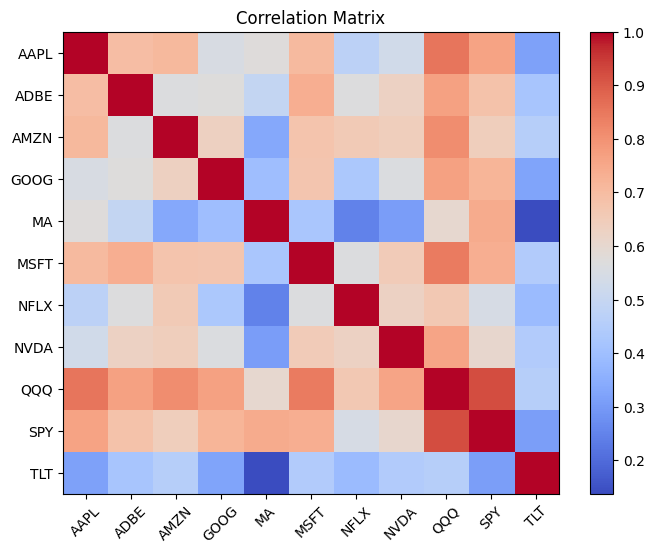

In [17]:
# Calculate the correlations between all the monthly returns of stocks with eachother
correlations = monthly_ret.corr()

# ** Code to Display Heat Map **

plt.figure(figsize=(8, 6))
plt.imshow(correlations, cmap='coolwarm', interpolation='none', aspect='auto')
plt.colorbar()

# Add labels for the axes
tick_marks = np.arange(len(correlations.columns))
plt.xticks(tick_marks, correlations.columns, rotation=45)
plt.yticks(tick_marks, correlations.columns)

plt.title('Correlation Matrix')
plt.show()

## Case Study: Airbus vs Boeing

Lets now used what we have done over the course of this notebook to explore the relationship between Airbus and Boeing.

Tickers: 'BA' and 'EADSY'

In [18]:
# Load in the data for both stocks:

tickers = ['BA', 'EADSY']

data = yf.download(
    tickers = tickers, # The stocks do we want to get
    interval = "1d", # The sample rate of the data
    start="2020-05-01", # From what point do we want to start getting stock data
    end="2024-04-30", # From what point do we want to stop getting stock data
    ignore_tz=True,
    auto_adjust=True, # Adjust all fields by splits and dividends
)

data.head()

[*********************100%***********************]  2 of 2 completed


Price                           Close                   High             \
Ticker                             BA      EADSY          BA      EADSY   
Date                                                                      
2020-05-01 00:00:00+00:00  133.369995  14.619903  143.710007  15.087816   
2020-05-04 00:00:00+00:00  131.460007  14.457565  131.500000  14.457565   
2020-05-05 00:00:00+00:00  125.400002  14.352522  133.800003  14.982772   
2020-05-06 00:00:00+00:00  121.860001  13.741370  126.860001  14.266578   
2020-05-07 00:00:00+00:00  128.649994  14.553056  130.710007  14.686746   

Price                             Low                   Open             \
Ticker                             BA      EADSY          BA      EADSY   
Date                                                                      
2020-05-01 00:00:00+00:00  132.839996  14.457565  143.229996  14.457565   
2020-05-04 00:00:00+00:00  124.349998  13.865512  127.120003  13.932356   
2020-05-05 00:00:00+00:00  125.000000  14.333424  132.880005  14.839534   
2020-05-06 00:00:00+00:00  121.370003  13.722271  125.800003  14.257030   
2020-05-07 00:00:00+00:00  122.360001  13.999199  122.809998  14.037396   

Price                        Volume           
Ticker                           BA    EADSY  
Date                                          
2020-05-01 00:00:00+00:00  36613100   425000  
2020-05-04 00:00:00+00:00  30708900   680600  
2020-05-05 00:00:00+00:00  30621000   784100  
2020-05-06 00:00:00+00:00  29627700   582900  
2020-05-07 00:00:00+00:00  29525000  1213800

In [19]:
# Take the close values
df = data['Close'].copy()

In [20]:
df.describe()

Ticker,BA,EADSY
count,1005.000000,1005.000000
mean,196.513642,29.203996
std,32.407425,6.381721
min,115.860001,12.795995
25%,174.279999,26.069450
50%,203.380005,29.430786
75%,217.470001,32.734829
max,269.190002,45.743877


In [21]:
# Compute Daily returns and fill NaN values
df = df.pct_change().fillna(0)

# Resample the data, grouping it into months for the monthly returns to be computed
monthly_ret = df.resample('ME')

# Apply our custom function to these months
monthly_ret = monthly_ret.apply(lambda x: (1 + x).prod() - 1)

# Display data
monthly_ret.head()

Ticker,BA,EADSY
Date,,
2020-05-31 00:00:00+00:00,0.093574,0.044415
2020-06-30 00:00:00+00:00,0.256771,0.116323
2020-07-31 00:00:00+00:00,-0.138025,0.015686
2020-08-31 00:00:00+00:00,0.087468,0.135687
2020-09-30 00:00:00+00:00,-0.038180,-0.119475


In [22]:
# Let's see what the worse month was for both companies...

ba_min = monthly_ret['BA'].min()
ba_min_index = monthly_ret['BA'].idxmin()

print(f'The worse Boeing day was a {round((ba_min * 100), 2)}% decrese in Boeing Stock on {ba_min_index.month_name()} {ba_min_index.year}')

ab_min = monthly_ret['EADSY'].min()
ab_min_index = monthly_ret['EADSY'].idxmin()

print(f'The worse Airbus day was a {round((ab_min * 100), 2)}% decrese in Airbus Stock on {ab_min_index.month_name()} {ab_min_index.year}')

The worse Boeing day was a -24.44% decrese in Boeing Stock on September 2022
The worse Airbus day was a -16.9% decrese in Airbus Stock on June 2022


#### What happened in those months?

**In September 2022:** Boeing announced a $200 million settlement with the U.S. Securities and Exchange Commission (SEC) over charges that the company misled investors about the safety of the 737 Max.

**In June 2022:** Shares in aircraft manufacturer Airbus (AIR) posted the biggest fall on the Paris Bourse after the company issued a profit warning due to problems with its supply chains and asset write-downs. At 10:42 UK time, the share price was down 11.2% at EUR 132.84 (£112.27).


In [23]:
# Calculate the final returns over the time period
cumulative_ret = (1 + monthly_ret).cumprod()

In [24]:
# Import in a custom plotting library
import plotly.express as px

# Let's plot the monthly returns of both these stocks
px.line(cumulative_ret)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'Ticker=BA<br>Date=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'BA',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'BA',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array([datetime.datetime(2020, 5, 31, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2020, 6, 30, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2020, 7, 31, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2020, 8, 31, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2020, 9, 30, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2020, 10, 31, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2020, 11, 30, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2020, 12, 31, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2021, 1, 31, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2021, 2, 28, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2021, 3, 31, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2021, 4, 30, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2021, 5, 31, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2021, 6, 30, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2021, 7, 31, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2021, 8, 31, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2021, 9, 30, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2021, 10, 31, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2021, 11, 30, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2021, 12, 31, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2022, 1, 31, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2022, 2, 28, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2022, 3, 31, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2022, 4, 30, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2022, 5, 31, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2022, 6, 30, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2022, 7, 31, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2022, 8, 31, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2022, 9, 30, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2022, 10, 31, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2022, 11, 30, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2022, 12, 31, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2023, 1, 31, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2023, 2, 28, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2023, 3, 31, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2023, 4, 30, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2023, 5, 31, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2023, 6, 30, 0, 0, tzinfo=datetime.timezone.utc),
                      

In [25]:
# We can use the cumulative return values to estimate how much we would had made if we invested £100 in Airbus and Boeing from July 2020 to Feb 2024

invested = 100 # Let's say we invested £100
final_cumulative_ret = cumulative_ret.iloc[-1] # Get the final cumulative return value

stock_value_airbus = invested * final_cumulative_ret['EADSY']
stock_value_boeing = invested * final_cumulative_ret['BA']

print(f'Value of the orginal £100 pound investment if it had been invested in Airbus: £{round(stock_value_airbus, 2)}')
print(f'Value of the orginal £100 pound investment if it had been invested in Boeing: £{round(stock_value_boeing, 2)}')

Value of the orginal £100 pound investment if it had been invested in Airbus: £284.75
Value of the orginal £100 pound investment if it had been invested in Boeing: £130.08


### Risk Anaylsis
Let's have a look at the best ways for us to identify and calculate the risk of an asset. One way to do that is to look at the standard deviation of a stock over time.


In [26]:
# Get the std of the monthly returns:
risk = monthly_ret.std()

print('The risk of investing in Airbus is: ', round(risk['EADSY'], 4))
print('The risk of investing in Boeing is: ', round(risk['BA'], 4))

The risk of investing in Airbus is:  0.1038
The risk of investing in Boeing is:  0.134


We can see that the standard deviation of the monthly returns for Airbus is far lower than Boeing which is exactly what we would expect. Airbus is a less risky investment.

# Challenge:

In this notebook we have explore some data exploration technqiues and touched on some basic mathematical approaches for analysing stocks.

**Your task**: Is to find/choose two stocks that you like, and calculate the best time to buy/sell these specific stocks, and then further calculate when the best time would be to buy both stocks at the same time.